In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


in this data the total 571 rows and 43 columns in which dependent variable is continuous and all other are categorical data

In [5]:
for i in df:
    print(df[i].unique())

['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-97089' 'CS-97

[2.205 2.008 3.608 1.906 3.448 3.026 2.957 3.043 3.358 3.247 2.681 3.281
 2.792 3.523 3.443 2.777 3.248 1.787 3.572 3.483 2.246 2.956 2.953 3.586
 3.475 2.228 3.44  2.188 3.195 2.294 3.133 3.22  3.112 3.16  3.019 3.164
 3.332 2.165 3.7   3.033 2.696 2.851 3.058 1.493 2.069 1.996 3.897 3.848
 3.404 2.254 2.655 3.106 2.793 3.023 3.01  3.4   1.899 3.168 2.57  2.418
 2.564 2.468 3.769 2.999 2.768 2.822 3.189 2.715 3.578 3.49  2.805 3.458
 2.34  3.252 2.683 3.378 3.295 3.193 3.647 2.815 2.171 3.761 2.763 2.938
 2.06  1.261 2.378 2.861 2.363 2.084 1.38  1.89  3.861 1.805 3.925 3.919
 3.258 3.963 2.396 3.772 1.768 3.176 3.335 3.758 3.208 1.845 3.946 2.3
 3.759 3.516 2.087 3.137 2.011 2.566 1.993 3.334 2.056 2.552 2.028 2.58
 3.651 2.928 2.659 3.174 3.03  2.208 2.698 2.823 2.407 2.379 2.579 2.711
 1.714 2.653 1.749 1.708 3.363 1.763 2.943 1.    3.906 3.873 3.217 2.603
 3.625 3.366 3.513 2.631 3.365 2.936 3.254 3.662 3.182 3.114 3.725 3.261
 3.5   3.571 3.227 2.918 3.672 3.241 2.982 3.246 2.35 

in data the seat no.is unique id hence its not required for target hence remove it

In [6]:
df.drop('Seat No.',axis=1,inplace=True)

In [7]:
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [9]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

we see lot of null present in lots ofcolumns hence fill this by the proper method

In [10]:
df['CY-105']=df['CY-105'].fillna(df['CY-105'].mode()[0])

In [14]:
df['CS-412']=df['CS-412'].fillna(df['CS-412'].mode()[0])
df['CS-423']=df['CS-423'].fillna(df['CS-423'].mode()[0])
df['CS-419']=df['CS-419'].fillna(df['CS-419'].mode()[0])

In [15]:
df['CS-414']=df['CS-414'].fillna(df['CS-414'].mode()[0])
df['CS-406']=df['CS-406'].fillna(df['CS-406'].mode()[0])
df['CS-421']=df['CS-421'].fillna(df['CS-421'].mode()[0])


In [16]:
df['CS-317']=df['CS-317'].fillna(df['CS-317'].mode()[0])
df['CS-312']=df['CS-312'].fillna(df['CS-312'].mode()[0])
df['CS-306']=df['CS-306'].fillna(df['CS-306'].mode()[0])
df['CS-318']=df['CS-318'].fillna(df['CS-318'].mode()[0])
df['EL-332']=df['EL-332'].fillna(df['EL-332'].mode()[0])

In [18]:
df['MT-442']=df['MT-442'].fillna(df['MT-442'].mode()[0])
df['TC-383']=df['TC-383'].fillna(df['TC-383'].mode()[0])
df['CS-302']=df['CS-302'].fillna(df['CS-302'].mode()[0])
df['CS-301']=df['CS-301'].fillna(df['CS-301'].mode()[0])
df['HS-304']=df['HS-304'].fillna(df['HS-304'].mode()[0])
df['EF-303']=df['EF-303'].fillna(df['EF-303'].mode()[0])
df['MT-331']=df['MT-331'].fillna(df['MT-331'].mode()[0])
df['CS-215']=df['CS-215'].fillna(df['CS-215'].mode()[0])
df['CS-212']=df['CS-212'].fillna(df['CS-212'].mode()[0])
df['EE-217']=df['EE-217'].fillna(df['EE-217'].mode()[0])

In [19]:
df['CS-214']=df['CS-214'].fillna(df['CS-214'].mode()[0])
df['CS-203']=df['CS-203'].fillna(df['CS-203'].mode()[0])
df['CS-211']=df['CS-211'].fillna(df['CS-211'].mode()[0])
df['CS-210']=df['CS-210'].fillna(df['CS-210'].mode()[0])
df['MT-224']=df['MT-224'].fillna(df['MT-224'].mode()[0])
df['EE-222']=df['EE-222'].fillna(df['EE-222'].mode()[0])
df['MT-222']=df['MT-222'].fillna(df['MT-222'].mode()[0])
df['HS-205/20']=df['HS-205/20'].fillna(df['HS-205/20'].mode()[0])
df['CS-107']=df['CS-107'].fillna(df['CS-107'].mode()[0])
df['ME-107']=df['ME-107'].fillna(df['ME-107'].mode()[0])
df['EE-119']=df['EE-119'].fillna(df['EE-119'].mode()[0])
df['EL-102']=df['EL-102'].fillna(df['EL-102'].mode()[0])

In [20]:
df['CS-106']=df['CS-106'].fillna(df['CS-106'].mode()[0])
df['MT-111']=df['MT-111'].fillna(df['MT-111'].mode()[0])
df['HS-105/12']=df['HS-105/12'].fillna(df['HS-105/12'].mode()[0])
df['CY-105']=df['CY-105'].fillna(df['CY-105'].mode()[0])

In [21]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

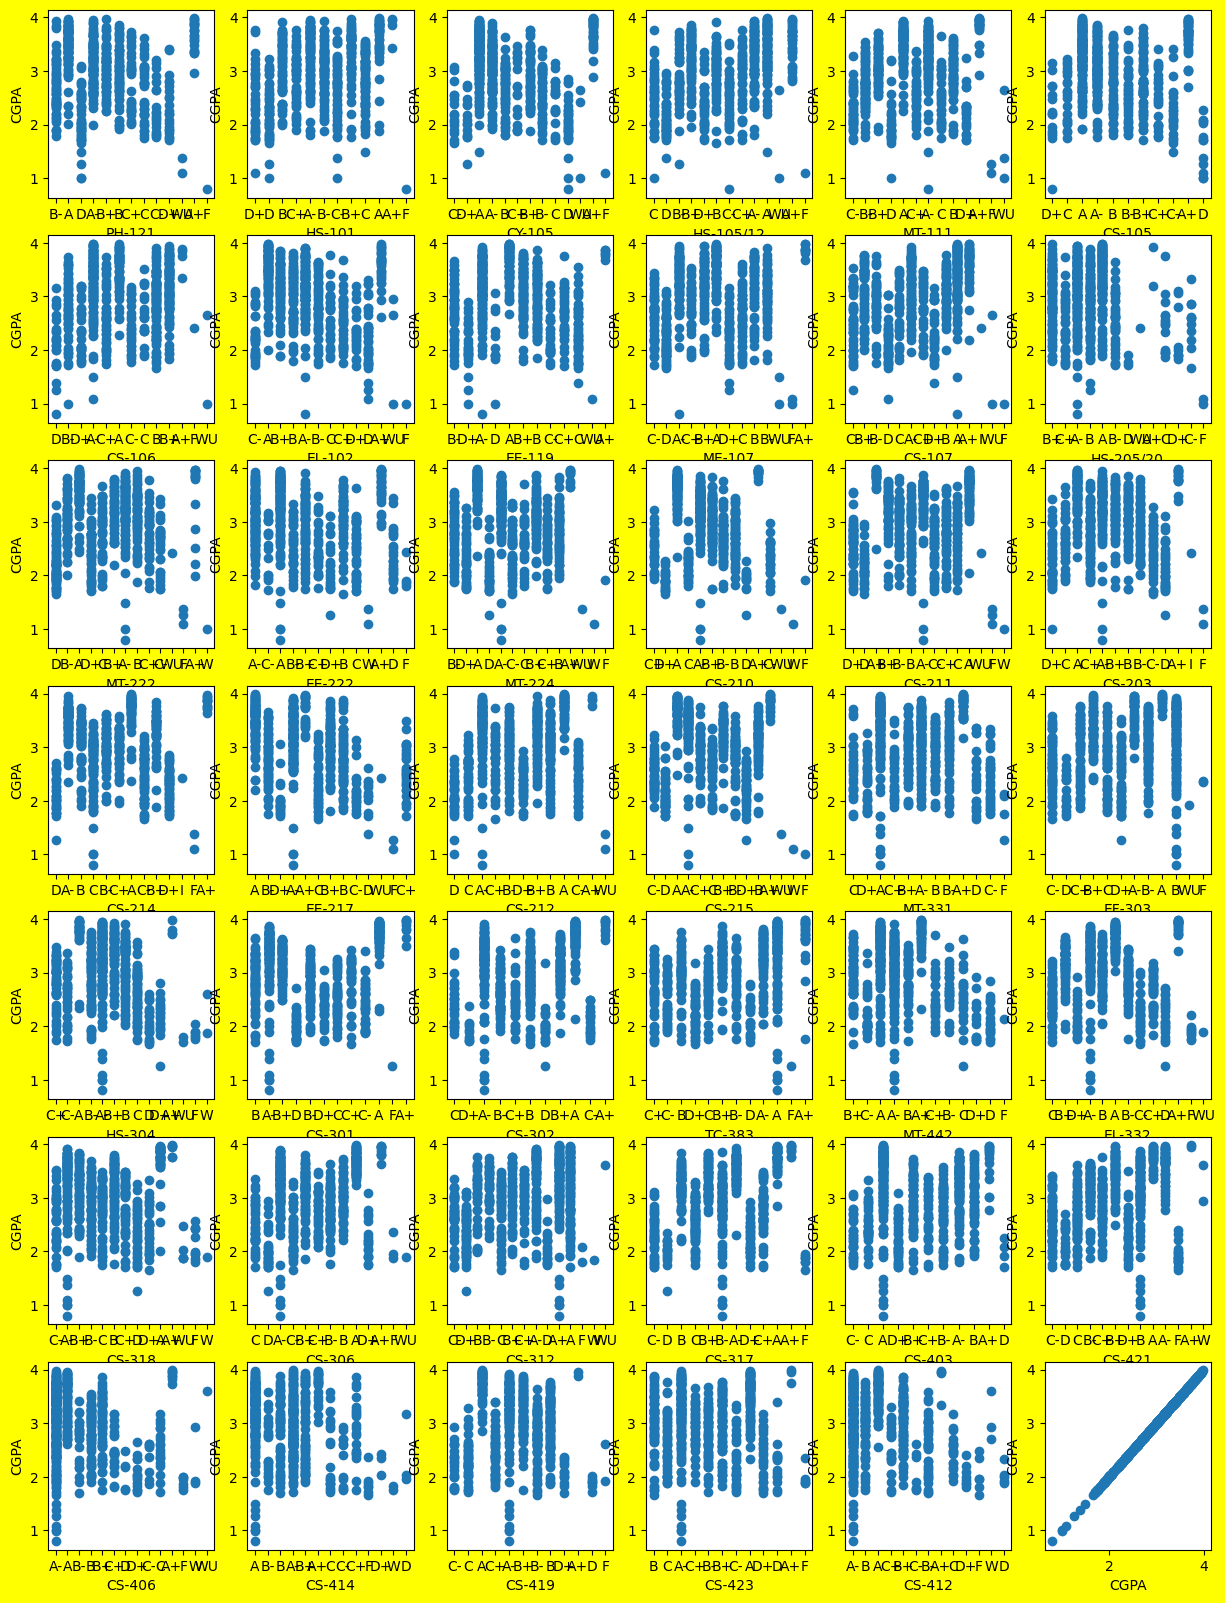

In [31]:
#lets observe the relation ship graph between independent anddependent variable 
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=42:
        ax= plt.subplot(7,6,plotnumber)
        plt.scatter(df[column],df['CGPA'])
        plt.xlabel(column)
        plt.ylabel('CGPA')
    plotnumber+=1
plt.show()  

In [22]:
#letsencode our data to better fitting
encode_data= pd.get_dummies(df)

In [23]:
encode_data

,CGPA,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,2.205,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.008,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3.608,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.448,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.798,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,3.772,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,3.470,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,2.193,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
#then seperate our data to target and lebel
x= encode_data.drop('CGPA',axis=1)
y= encode_data['CGPA']

print(x.shape)
print(y.shape)

(571, 526)
(571,)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [33]:
#then come to model initializing and training
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs= i
print('best accuracy is', maxacc, 'at random state', maxrs)        

best accuracy is 0.8709858792157641 at random state 158


In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 158)

In [36]:
knn= knn(n_neighbors=5)
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
predknn1= knn.predict(x_train)
print('r2 score:\n',r2_score(y_test,predknn))
print('r2 score on training data:\n', r2_score(y_train,predknn1))


r2 score:
 0.9100483918851233
r2 score on training data:
 0.9315137589503972


In [37]:
svr= SVR()
svr.fit(x_train,y_train)
predsv= svr.predict(x_test)
predsv1= svr.predict(x_train)
print('r2 score:\n',r2_score(y_test,predsv))
print('r2 score on training data:\n', r2_score(y_train,predsv1))


r2 score:
 0.8730779014787478
r2 score on training data:
 0.9544515460803468


In [38]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
predrfc1= rfc.predict(x_train)
print('r2 score:\n',r2_score(y_test,predrfc))
print('r2 score on training data:\n', r2_score(y_train,predrfc1))


r2 score:
 0.8319066855668356
r2 score on training data:
 0.9704399428473096


In [39]:
# for checking crossval score for our models
from sklearn.model_selection import cross_val_score

score= cross_val_score(rfc,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predrfc)-score.mean())*100)

[0.77662899 0.82743879 0.75249037]
mean : 0.785519380002495
differnce between r2 score and cross validation score is:
 4.638730556434057


In [40]:
score= cross_val_score(knn,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predknn)-score.mean())*100)

[0.83304018 0.81771082 0.8310677 ]
mean : 0.8272728998443325
differnce between r2 score and cross validation score is:
 8.277549204079083


In [ ]:
we see that after cross validation knn model score is high hence we proceedd with this model for final prediction